In [ ]:
# ! cp /content/drive/MyDrive/Squeezenet/dataset.zip dataset.zip
! mkdir output
! unzip /content/drive/MyDrive/Squeezenet/dataset.zip -d output

# Importing Libraries

In [3]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt

import numpy as np
import torch
from torch import nn
from torch import optim
import torch.nn.functional as F
from torchvision import datasets, transforms, models
from PIL import Image
from torch.autograd import Variable

In [7]:
data_dir = 'dataset/val'

test_transforms = transforms.Compose([transforms.Resize(224),
                                      transforms.ToTensor(),
                                      #transforms.Normalize([0.485, 0.456, 0.406],
                                      #                     [0.229, 0.224, 0.225])
                                     ])

# Loading Model

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model=torch.load('drive/MyDrive/Squeezenet/model.pt')# Model path
model.eval()
model

# Prediction Function

In [8]:
def predict_image(image):
    image_tensor = test_transforms(image).float()
    image_tensor = image_tensor.unsqueeze_(0)
    input = Variable(image_tensor)
    input = input.to(device)
    output = model(input)
    index = output.data.cpu().numpy().argmax()
    return index  



# Testing on a Folder

In [19]:
import os
from PIL import Image
import cv2
# im = Image.open("images/cuba.jpg")
data_direct = "dataset//val//rear//"
files3 = os.listdir("dataset//val//rear//")
result = list()
for filee in files3:

  im = cv2.imread(data_direct+filee)
  im = Image.fromarray(im)
  # im = Image.open(data_direct+filee)
  # print(data_direct+filee)
  res = predict_image(im)
  # print(predict_image(im))
  if(res==1):
    result.append("Rear")
  else:
    result.append("Front")

print(result)

['Rear', 'Rear', 'Rear', 'Rear', 'Rear', 'Rear', 'Rear', 'Rear', 'Rear', 'Rear', 'Rear', 'Rear', 'Rear', 'Rear', 'Rear', 'Rear', 'Rear', 'Rear', 'Rear', 'Front', 'Rear', 'Rear', 'Rear', 'Rear', 'Rear', 'Rear', 'Rear', 'Rear', 'Rear', 'Rear', 'Rear', 'Rear', 'Rear', 'Rear', 'Rear', 'Rear', 'Rear', 'Rear', 'Rear', 'Rear', 'Rear', 'Rear', 'Rear', 'Rear', 'Rear', 'Rear', 'Rear', 'Rear', 'Rear', 'Rear', 'Rear', 'Rear']


#Testing on an Image

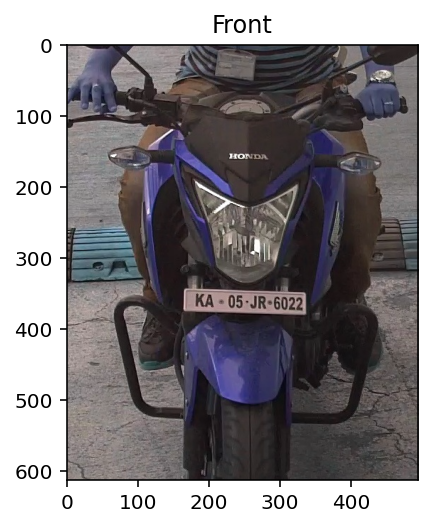

In [23]:
import os
from PIL import Image
import cv2
image_name = "dataset//val//front//6010.jpg" # Image Path
im = cv2.imread(image_name)
im = Image.fromarray(im)
plt.imshow(im)
res = predict_image(im)
if(res==1):
  ch = "Rear"
else:
  ch = "Front"
plt.title(ch)
plt.show()